In [1]:
import warnings
warnings.filterwarnings('ignore')

<h1 style = "fontsize:400%;text-align:center;">QBUS3850: Time Series and Forecasting</h1>
<h2 style = "fontsize:300%;text-align:center;">VAR: Vector Autoregression</h2>
<h3 style = "fontsize:200%;text-align:center;">Lecture Notes</h3>

<h2 style = "fontsize:300%;text-align:center;">Multivariate Forecasting</h2>

# Motivation

- In many settings we have a multivariate forecasting problem:
  - In macroeconomics we may have to forecast interest rates, inflation and wages.
  - In retail we may need to forecast the sales of many stock keeping units (SKUs), e.g laptops, monitors, cables.
  - In tourism we may need to forecast visitor numbers in different regions.
- In all of these settings, some variables may help us to predict future values of other variables.

# Vector

- Rather than forecast a single observation we need to forecast a vector of observations:

$$\mathbf{y}_t = \begin{pmatrix}\textrm{Interest Rates}_t\\ \textrm{Inflation}_t\\ \textrm{Wages}_t\end{pmatrix}$$

- Note that I will use a **bold** font for matrices and vectors.

# Vector  Autoregression

The Vector Autoregression of order 1 or VAR(1) is written as

$$\mathbf{y}_t=\mathbf{c}+\boldsymbol{\Phi}\mathbf{y}_{t-1}+\boldsymbol{\epsilon}_t$$

- $\mathbf{y}_t$ is a $n$-vector of observations at time $t$,
- $\mathbf{c}$ is an $n$-vector of intercepts,
- $\boldsymbol{\Phi}$ is a $n\times n$ matrix of coefficients,
- $\boldsymbol{\epsilon}_t$ is a $n$-vector of error terms with mean $\mathbf{0}$ and a variance covariance matrix $\boldsymbol{\Sigma}$

# In detail

$$\begin{pmatrix}\textrm{Interest Rates}_t\\ \textrm{Inflation}_t\\ \textrm{Wages}_t\end{pmatrix} = \begin{pmatrix}\phi_{11} & \phi_{21} &\phi_{31}\\\phi_{12}&\phi_{22}&\phi_{32}\\\phi_{13}&\phi_{23}&\phi_{33} \end{pmatrix}\begin{pmatrix}\textrm{Interest Rates}_{t-1}\\ \textrm{Inflation}_{t-1}\\ \textrm{Wages}_{t-1}\end{pmatrix}+\begin{pmatrix}\epsilon_{1t}\\ \epsilon_{2t}\\ \epsilon_{3t}\end{pmatrix}$$

The coefficient $\phi_{13}$ gives the effect of the interest rates on wages in the following period. Note $\phi_{ij}\neq\phi_{ji}$

# VAR(p) model

The VAR(p) model is given by

$$\mathbf{y}_t=\mathbf{c}+\boldsymbol{\Phi}^{(1)}\mathbf{y}_{t-1}+\boldsymbol{\Phi}^{(2)}\mathbf{y}_{t-2}+\dots+\boldsymbol{\Phi}^{(p)}\mathbf{y}_{t-p}+\boldsymbol{\epsilon}_t$$

The total number of parameters in this model is $n+p(n^2)+n(n+1)/2$. 

A VAR(2) with 3 variables has 27 parameters. A VAR(1) with 10 variables has 165 parameters!


# Stationarity of VAR(1)

Can do a similar process to the AR(1)

$$\begin{aligned}\mathbf{y}_t&=\boldsymbol{\Phi} {\color{red} {\mathbf{y}_{t-1}} }+\boldsymbol{\epsilon}_t\\&=\boldsymbol{\Phi} {\color{red} {(\boldsymbol{\Phi} \mathbf{y}_{t-2}+\boldsymbol{\epsilon}_{t-1}) }}+\boldsymbol{\epsilon}_t\\ &=\boldsymbol{\Phi}^2 {\color{blue}{\mathbf{y}_{t-2}}} +\boldsymbol{\Phi}\boldsymbol{\epsilon}_{t-1}+\boldsymbol{\epsilon}_t\\ &=\boldsymbol{\Phi}^2 {\color{blue}{(\boldsymbol{\Phi} \mathbf{y}_{t-3}+\boldsymbol{\epsilon}_{t-2})}} +\boldsymbol{\Phi}\boldsymbol{\epsilon}_{t-1}+\boldsymbol{\epsilon}_t\\ &=\boldsymbol{\Phi}^3\mathbf{y}_{t-3}+\boldsymbol{\Phi}^2\boldsymbol{\epsilon}_{t-2} +\boldsymbol{\Phi\epsilon}_{t-1}+\boldsymbol{\epsilon}_t \end{aligned}$$

# MA($\infty$) representation

Continuing iterateively we get

$$\mathbf{y}_t=\boldsymbol{\epsilon}_t+\boldsymbol{\Phi\epsilon}_{t-1}+\boldsymbol{\Phi}^2\boldsymbol{\epsilon}_{t-2}+\dots+\boldsymbol{\Phi}^j\mathbf{y}_{t-j}$$ 

As $j\rightarrow\infty$ what is required for $\boldsymbol{\Phi}^j\mathbf{y}_{t-j}$ to disappear?

To answer we will use the eigenvalue decomposition of $\boldsymbol{\Phi}$.

# Eigenvalue decomposition

The eigenvalue decomposition breaks down a square matrix as 

$$\underset{(n\times n)}{\boldsymbol{\Phi}}=\underset{(n\times n)}{\mathbf{U}}\underset{(n\times n)}{\boldsymbol{\Lambda}}\underset{(n\times n)}{\mathbf{U}}'$$

The matrix $\mathbf{U}$ satisfies $\mathbf{U}'\mathbf{U}\mathbf{I}$

The matrix $\boldsymbol{\Lambda}$ is diagonal, i.e

$$\boldsymbol{\Lambda}=\begin{pmatrix}\lambda_1 & 0 &\dots &0\\0&\lambda_2&\ddots&\vdots\\\vdots&\ddots&\ddots&0\\0&\cdots&0&\lambda_n\end{pmatrix}$$

# Eigenvalue decomposition

$$\boldsymbol{\Phi}^j=(\mathbf{U}\boldsymbol{\Lambda}\mathbf{U}')\times(\mathbf{U}\boldsymbol{\Lambda}\mathbf{U}')\underset{\textrm{j terms}}{\times\dots\times}(\mathbf{U}\boldsymbol{\Lambda}\mathbf{U}')$$

Since $\mathbf{U}'\mathbf{U}=\mathbf{I}$ it holds that $\boldsymbol{\Phi}^j=\mathbf{U}\boldsymbol{\Lambda}\mathbf{U}'$. Since $\boldsymbol{\Lambda}$ is diagonal, this implies

$$\boldsymbol{\Phi}^j=\mathbf{U}\begin{pmatrix}\lambda^j_1 & 0 &\dots &0\\0&\lambda^j_2&\ddots&\vdots\\\vdots&\ddots&\ddots&0\\0&\cdots&0&\lambda^j_n\end{pmatrix}\mathbf{U}'$$

As long as $\lambda$'s are all lie between -1 and 1 (or inside the unit circle if they are complex), then the VAR is stationary.

# Estimation

- The VAR parameters can be estimated by equation least squares.
- This is consistent as long as the variables are **stationary**.
- The variance covariance matrix can be estimated from residuals, $\boldsymbol{\Sigma}=(1/(T-1))\sum_{t=1}^T\boldsymbol{e}\boldsymbol{e}'_t$.
- Make sure each variable in a VAR model is stationary using tests for stationarity and differencing.



# Cointegration

- Sometimes non-stationary variables can be used in a VAR and least squares estimates are consistent.
- Mathematically, this occurs when a linear combination of non-stationary variables is stationary.
- In practice, this happens when there are long run equilibria between the variables
- This is known as **cointegration** and hypothesis tests exist for determining whether variables have this property.
- We will not be cover cointegration (or alternative models for cointegrated variables) in this course.

# An application


In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
dat=pd.read_csv('prices.csv')
dat['Date']=pd.to_datetime(dat['Date'])
print(dat)

          Date   Fuel   Food  Restaurants
0   1986-12-01   36.4   40.9         39.4
1   1987-03-01   37.2   41.3         40.0
2   1987-06-01   36.7   41.4         40.5
3   1987-09-01   36.2   42.0         41.2
4   1987-12-01   37.4   42.5         41.8
..         ...    ...    ...          ...
135 2020-09-01   88.1  112.9        115.8
136 2020-12-01   88.5  113.0        117.2
137 2021-03-01   96.2  113.0        117.8
138 2021-06-01  102.5  113.9        117.1
139 2021-09-01  109.8  114.5        119.0

[140 rows x 4 columns]


# Plot


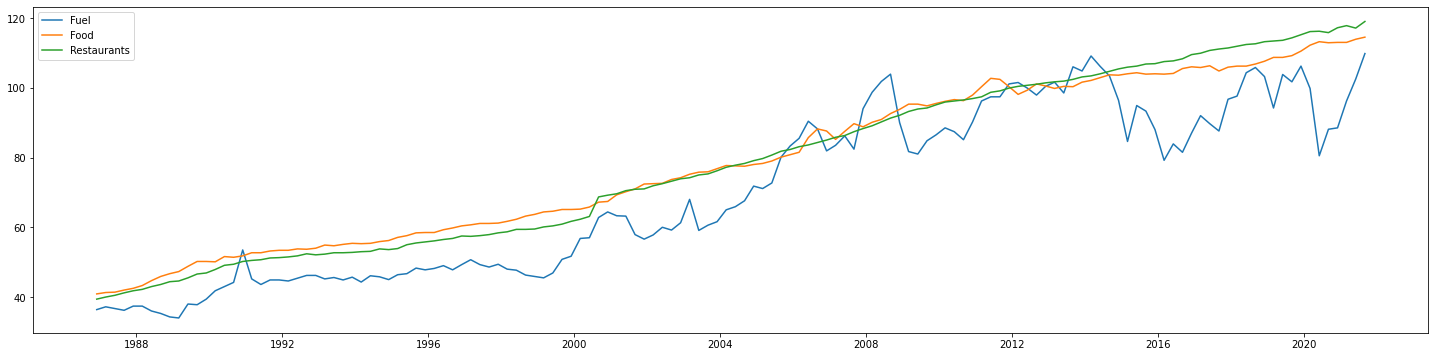

In [3]:
from matplotlib import pyplot as plt
fig,ax = plt.subplots(figsize = (25,6))
ax.plot(dat['Date'],dat['Fuel'],label='Fuel')
ax.plot(dat['Date'],dat['Food'],label='Food')
ax.plot(dat['Date'],dat['Restaurants'],label='Restaurants')
plt.legend()

# Differenced data

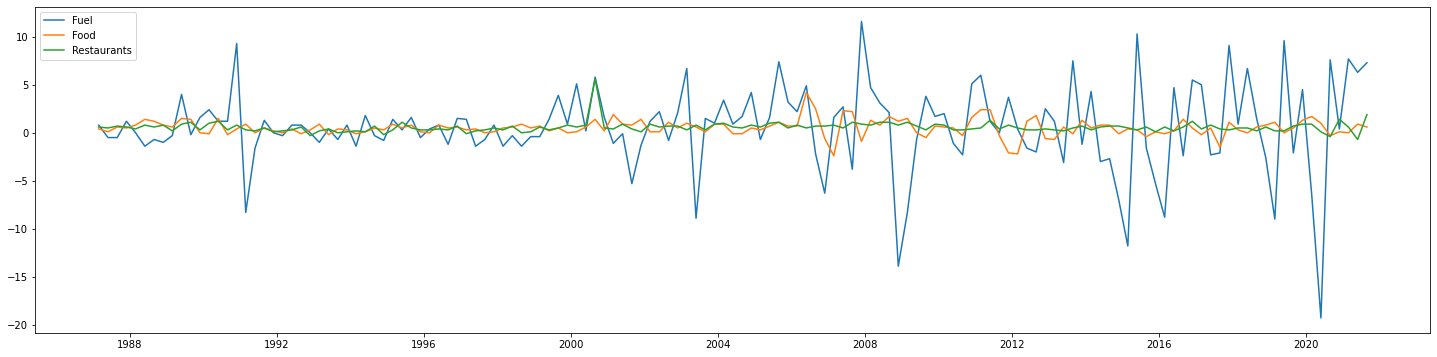

In [4]:
ddat=dat.diff()
fig,ax = plt.subplots(figsize = (25,6))
ax.plot(dat['Date'],ddat['Fuel'],label='Fuel')
ax.plot(dat['Date'],ddat['Food'],label='Food')
ax.plot(dat['Date'],ddat['Restaurants'],label='Restaurants')
plt.legend()

# Fit VAR

In [5]:
model=VAR(ddat.iloc[1:,1:]).fit(1)
model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 09, Mar, 2022
Time:                     22:39:57
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    1.72505
Nobs:                     138.000    HQIC:                   1.57394
Log likelihood:          -676.905    FPE:                    4.35164
AIC:                      1.47050    Det(Omega_mle):         3.99415
--------------------------------------------------------------------
Results for equation Fuel
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.833457         0.571754            1.458           0.145
L1.Fuel               -0.024439         0.086930           -0.281           0.779
L1.Food               -0.806485         0.459897         

<h2 style = "fontsize:300%;text-align:center;">Impulse Response Analysis</h2>

# Impulse response analysis

- An additional feature of VAR modelling is to find the Impulse Response Function (IRF).
- As opposed to forecasting, the purpose of an IRF is to evaluate the impact of *policy decisions*.
- The typical question asked when using IRFs is the following
  - If there is a *shock* to some variable, what is the future impact on other variables?
- What do we mean by shock?

# Example

- Consider the example of a VAR with interest rates, inflation and wages.
- In this case a central bank which can influence interest rates may want to investigate the effect of a rate shock on inflation and wages.
- What do we mean by a rate shock?

# Errors as shocks

- The simple way is to think of each error as a shock.
- In the example:
 - $\epsilon_1$ is the interest rate shock
 - $\epsilon_2$ is the inflation shock
 - $\epsilon_3$ is the wage shock
- What is the effect of shocks on variables at different lags?

# Use MA($\infty$)

- Suppose the MA representation of a VAR is

$$\mathbf{y}_t=\boldsymbol{\epsilon}_t+\Theta_1\boldsymbol{\epsilon}_{t-1}+\Theta_2\boldsymbol{\epsilon}_{t-2}+\Theta_3\boldsymbol{\epsilon}_{t-3}+\dots$$

- Remember the $\Theta$ are just functions of $\Phi$
- Element in row $i$ and column $j$ of $\Theta_k$ gives the  

# Application

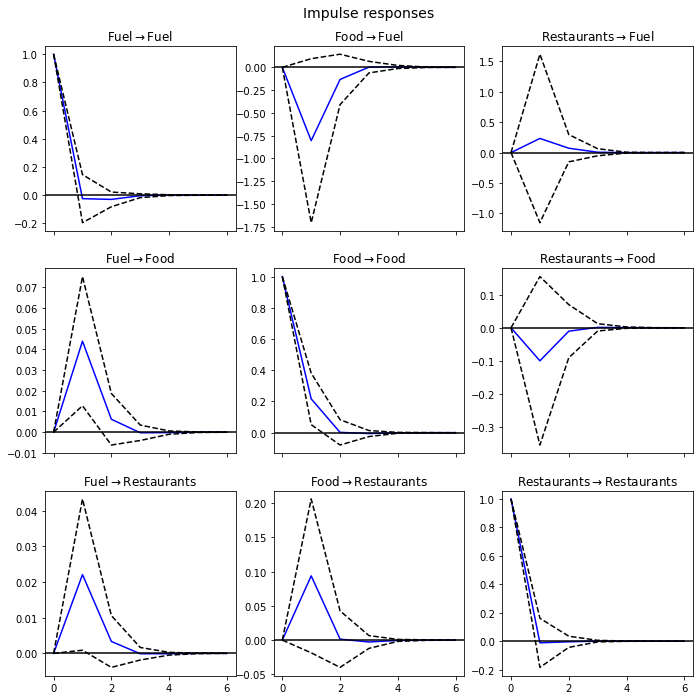

In [6]:
irf = model.irf(6).plot(orth=False)

# Conclusions

- Fuel price shocks have a significant effect on food and restuarants after 1 period
- No other effects are statistically significant (confidence intervals include zero)
- There are no long term effects. All IRF revert to zero after at most four periods.

# Orthogonalise Errors

- In the previous example, treating $\epsilon$ as a shock is not always valid.
- The shocks are correlated (via $\Sigma$), so a change in $\epsilon$ is not a "pure" shock
- To get a "pure" shock we transform the errors to be uncorrelated.
- This can be done a few different ways, the most standard is the Cholesky decomposition.

# Cholesky Decompsition

Can find a decomposition $\boldsymbol{\Sigma}=\mathbf{P}\mathbf{P}'$ where the matrix $\mathbf{P}$ is lower triangular.

$$\mathbf{P} = \begin{pmatrix}p_{11} &0 &\dots&0\\p_{12} &p_{22} &\ddots&\vdots\\{\vdots} &\ddots &\ddots&0\\ p_{1n}&\dots &\ddots&p_{nn}\end{pmatrix}$$

Also $\mathbf{P}^{-1}$ will also be lower triangular

# Orthogonal Errors

Get "new" errors $\mathbf{u}_t=\mathbf{P}^{-1}\boldsymbol{\epsilon}_t$. These have variance covariance matrix

$$\begin{aligned}\textrm{Var-Cov}(\mathbf{u}_t)&=E(\mathbf{u}_t\mathbf{u}'_t)\\&=E\left(\mathbf{P}^{-1}\boldsymbol{\epsilon}_t\boldsymbol{\epsilon}'_t(\mathbf{P}^{-1})'\right)\\&=\mathbf{P}^{-1}E\left(\boldsymbol{\epsilon}_t\boldsymbol{\epsilon}'_t\right)(\mathbf{P}^{-1})'\\&=\mathbf{P}^{-1}\boldsymbol{\Sigma}(\mathbf{P}^{-1})'\\&=\mathbf{P}^{-1}\mathbf{P}\mathbf{P}'(\mathbf{P}')^{-1}\\&=\mathbf{I}\end{aligned}$$

The errors are uncorrelated so can be thought of as "pure" shocks

# 3-variable example

Since $\mathbf{u}_t=\mathbf{P}^{-1}\boldsymbol{\epsilon}_t$ it also holds that $\boldsymbol{\epsilon}_t=\mathbf{P}\mathbf{u}_t$

$$\begin{pmatrix}\epsilon_{1,t}\\\epsilon_{2,t}\\\epsilon_{3,t}\end{pmatrix}=\begin{pmatrix}p_{11}&0&0\\p_{12} & p_{22} & 0\\p_{13} & p_{23} & p_{33}\end{pmatrix}\begin{pmatrix}u_{1,t}\\u_{2,t}\\u_{3,t}\end{pmatrix}$$

- The first error only depends on the first "pure" shock.
- The second error depends on the first ad second "pure" shocks.
- The third error depends on the all "pure" shocks.


# Orthogonal IRF

Replace $\boldsymbol{\epsilon}_t$ with $\mathbf{P}\mathbf{u}_t$ in MA($\infty$) representation 

$$\mathbf{y}_t=\boldsymbol{\epsilon}_t+\boldsymbol{\Theta_1}\boldsymbol{\epsilon}_{t-1}+\boldsymbol{\Theta}_2\boldsymbol{\epsilon}_{t-2}+\boldsymbol{\Theta}_3\boldsymbol{\epsilon}_{t-3}+\dots$$

becomes

$$\mathbf{y}_t=\mathbf{P}\mathbf{u}_t+\boldsymbol{\Theta_1}\mathbf{P}\mathbf{u}_{t-1}+\boldsymbol{\Theta}_2\mathbf{P}\mathbf{u}_{t-2}+\boldsymbol{\Theta}_3\mathbf{P}\mathbf{u}_{t-3}+\dots$$

This gives the orthogonal IRF



# The catch

- There is a strong hidden assumption here.
- The results will depend on the order of the variables. Stacking the vector as

$$\mathbf{y}_t = \begin{pmatrix}\textrm{Interest Rates}_t\\ \textrm{Inflation}_t\\ \textrm{Wages}_t\end{pmatrix}\quad\textrm{and}\quad\mathbf{y}_t = \begin{pmatrix} \textrm{Inflation}_t\\ \textrm{Interest Rates}_t\\\textrm{Wages}_t\end{pmatrix}$$

will give different results

# Choosing ordering

- Choosing the ordering must be based on knowledge of the data.
- There needs to be a plausible mechanism by which one variable has more influence on others
  - Lower interest rates lead to higher inflation which leads to higher wages.
  - Fuel prices influence food prices which influence restuarant prices.
- There is no statistical test for preferring one ordering over another

# Application

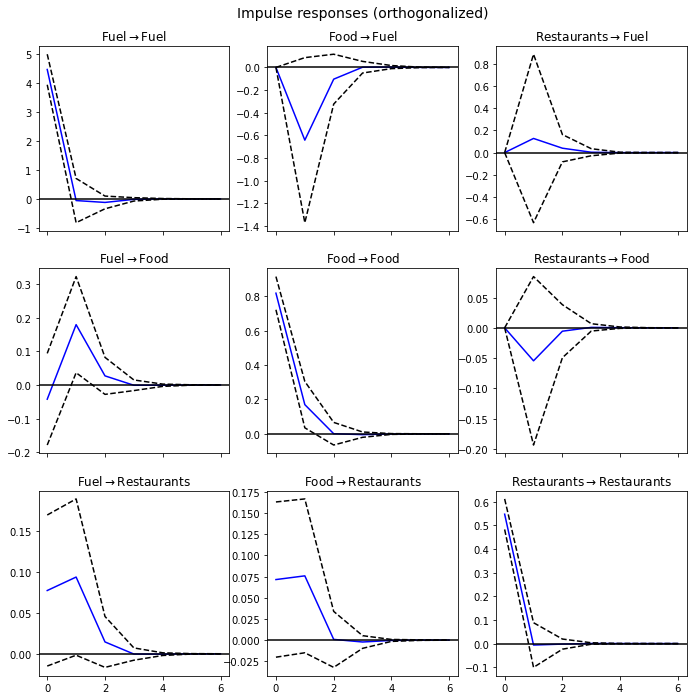

In [7]:
irf = model.irf(6).plot(orth=True)